In [1]:
import numpy as np
import pandas as pd

## load data
data = pd.read_csv("E:/Jupyter/DATA _ANALYST/1_Data_Management_and_Visualization/data/addhealth.csv", low_memory=False)
pd.set_option("display.float_format", lambda x: '%f'%x)
## convert column names to upper case
data.columns = map(str.upper, data.columns)

In [2]:
## only keep the variables that will be analysis
sub1 = data[['AID', 'H1GH2', 'H1ED1', 'H1ED2', 'H1GI1Y', 'H1TO16', 'H1TO7']]
sub2 = sub1[(sub1['H1GI1Y'] >= 80)]
sub = sub2.copy()
sub.head()

,AID,H1GH2,H1ED1,H1ED2,H1GI1Y,H1TO16,H1TO7
5,57104649,1,2,0,81,97,97
6,57104676,0,1,0,83,97,97
7,57109625,1,3,4,81,3,97
8,57110897,1,2,10,81,97,97
9,57111071,2,2,0,81,97,97


In [3]:
## convert object to numeric
sub['H1GH2'] = pd.to_numeric(sub['H1GH2'], errors='coerce')
sub['H1ED1'] = pd.to_numeric(sub['H1ED1'], errors='coerce')
sub['H1ED2'] = pd.to_numeric(sub['H1ED2'], errors='coerce')
sub['H1TO16'] = pd.to_numeric(sub['H1TO16'], errors='coerce')
sub['H1TO7'] = pd.to_numeric(sub['H1TO7'], errors='coerce')

In [4]:
## coding out missing data
sub['H1GH2'] = sub['H1GH2'].replace([6,8], np.nan)
sub['H1ED1'] = sub['H1ED1'].replace([6, 7, 8, 9], np.nan)
sub['H1ED2'] = sub['H1ED2'].replace([996, 997, 998], np.nan)
sub['H1TO16'] = sub['H1TO16'].replace([96, 97, 98, 99], np.nan)
sub['H1TO7'] = sub['H1TO7'].replace([96, 97, 98], np.nan)

In [21]:
## create secondary variables
def times_skip(row):
    if row['H1ED1']==0:
        return 0
    elif row['H1ED1']==1:
        return 2
    elif row['H1ED1']==2:
        return 7
    elif row['H1ED1']==3:
        return 45
    else:
        return np.nan
    
sub['SKIPQU'] = sub.apply(lambda row: times_skip(row), axis=1)

In [22]:
def total_skip(row):
    if row['SKIPQU'] != np.nan and row['H1ED2'] != np.nan:
        return row['SKIPQU']+row['H1ED2']
    elif row['SKIPQU'] == np.nan and row['H1ED2'] != np.nan:
        return row['H1ED2']
    elif row['SKIPQU'] != np.nan and row['H1ED2'] == np.nan:
        return row['SKIPQU']
    else:
        return np.nan
    
sub['SKIPFREQ'] = sub.apply(lambda row: total_skip(row), axis=1)

In [23]:
## create secondary variables
def head_level(row):
    if row['H1GH2']==0:
        return 0
    elif row['H1GH2']==1:
        return 0
    elif row['H1GH2']==2:
        return 0
    elif row['H1GH2']==3:
        return 1
    elif row['H1GH2']==4:
        return 1
    else:
        return np.nan
    
sub['HEADCAT'] = sub.apply(lambda row: head_level(row), axis=1)

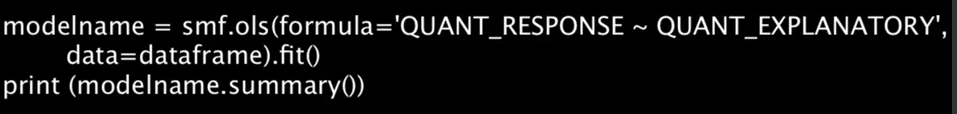

In [24]:
import statsmodels.formula.api as smf

model1 = smf.ols(formula = 'SKIPFREQ ~ HEADCAT', data = sub).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SKIPFREQ   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     14.77
Date:                Fri, 13 Apr 2018   Prob (F-statistic):           0.000124
Time:                        01:13:31   Log-Likelihood:                -10367.
No. Observations:                2545   AIC:                         2.074e+04
Df Residuals:                    2543   BIC:                         2.075e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5628      0.291     32.811      0.000       8.991      10.134
HEADCAT        4.4128      1.148      3.844      0.000       2.161       6.664
==============================================================================
Omnibus:                     1147.631   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4495.006
Skew:                           2.286   Prob(JB):                         0.00
Kurtosis:                       7.636   Cond. No.                         4.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
c1 = sub.groupby('HEADCAT').mean()
c1

,AID,H1GH2,H1ED1,H1ED2,H1GI1Y,H1TO16,H1TO7,SKIPQU,SKIPFREQ
HEADCAT,,,,,,,,,
0.000000,94098852.829725,1.137386,1.562081,0.738145,80.813489,4.451064,4.782396,8.819631,9.562789
1.000000,94228977.898810,3.148810,1.793939,0.469880,80.779762,5.275362,5.317073,13.460606,13.975610


In [26]:
c2 = sub.groupby('HEADCAT').std()
c2

,AID,H1GH2,H1ED1,H1ED2,H1GI1Y,H1TO16,H1TO7,SKIPQU,SKIPFREQ
HEADCAT,,,,,,,,,
0.000000,7002588.606254,0.555411,0.834328,4.043456,0.791574,6.200321,6.104810,13.072323,13.995195
1.000000,5765751.612288,0.356965,0.893725,1.504235,0.753639,6.342861,6.926179,16.898368,17.188936


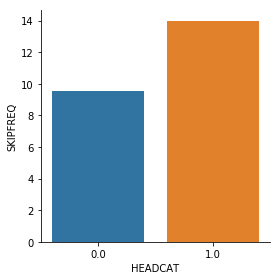

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.factorplot(x='HEADCAT', y='SKIPFREQ', data=sub, kind='bar', ci=None)
plt.show()

In [28]:
sub1 = sub.dropna()

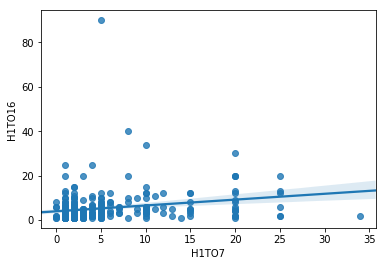

In [29]:
ax = sns.regplot(x='H1TO7', y='H1TO16', fit_reg=True, data=sub1)

In [6]:
import statsmodels.formula.api as smf

model2 = smf.ols(formula = 'H1TO16 ~ H1TO7', data = sub).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 H1TO16   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     21.00
Date:                Fri, 13 Apr 2018   Prob (F-statistic):           6.63e-06
Time:                        01:25:16   Log-Likelihood:                -1062.6
No. Observations:                 318   AIC:                             2129.
Df Residuals:                     316   BIC:                             2137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9101      0.498      7.847      0.000       2.930       4.890
H1TO7          0.2842      0.062      4.582      0.000       0.162       0.406
==============================================================================
Omnibus:                      454.557   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76724.667
Skew:                           6.919   Prob(JB):                         0.00
Kurtosis:                      77.827   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
sub1['H1TO7'].mean()

74.1070110701107

In [8]:
sub1['H1TO7'] = sub1['H1TO7'] - 74.1070110701107

D:\Users\beniu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
sub1['H1TO7'].mean()

-2.265783570059114e-14